In [1]:
import pandas as pd

In [9]:
data=pd.read_csv('generated_dataset.csv')
data

,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,user2,provider2,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,user3,provider3,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,user4,provider4,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,user5,provider5,App,2075,6,Topic5,2024-02-12,2024-02-25
...,...,...,...,...,...,...,...,...
9995,user9996,provider9996,Website,1500,5,Topic9996,2024-01-29,2024-02-08
9996,user9997,provider9997,Website,1500,3,Topic9997,2024-02-08,2024-02-23
9997,user9998,provider9998,Website,1725,6,Topic9998,2024-02-10,2024-02-13
9998,user9999,provider9999,Website,1500,5,Topic9999,2024-02-15,2024-02-28


In [10]:
columns_to_keep = [ 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()

,service,price,no_of_pages,topic,date,deadline
0,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,App,2075,6,Topic5,2024-02-12,2024-02-25


In [11]:

y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.00000
mean,7.78150
std,5.09619
min,1.00000
25%,4.00000
50%,6.00000
75%,10.25000
max,20.00000


In [12]:

data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']


In [13]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [14]:
data['days']=data['days'].dt.days
data.head()

,service,price,no_of_pages,topic,days
0,Website,1525,6,Topic1,11
1,PPT,200,7,Topic2,5
2,PPT,200,8,Topic3,13
3,Website,1525,6,Topic4,11
4,App,2075,6,Topic5,13


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['service']=label_encoder.fit_transform(data['service'])
data

#0-App
#1-Docs
#3-Website
#2-PPT


,service,price,no_of_pages,topic,days
0,3,1525,6,Topic1,11
1,2,200,7,Topic2,5
2,2,200,8,Topic3,13
3,3,1525,6,Topic4,11
4,0,2075,6,Topic5,13
...,...,...,...,...,...
9995,3,1500,5,Topic9996,10
9996,3,1500,3,Topic9997,15
9997,3,1725,6,Topic9998,3
9998,3,1500,5,Topic9999,13


In [19]:
data['service'].unique()

array([3, 2, 0, 1], dtype=int64)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
shuffled_df = data.iloc[np.random.permutation(len(data))]
X_train, X_test, y_train, y_test = train_test_split(shuffled_df[['days', 'no_of_pages', 'service']], shuffled_df['price'], test_size=0.3)


In [27]:
X_train.shape

(7000, 3)

In [28]:
X_test.shape

(3000, 3)

<Axes: xlabel='service', ylabel='no_of_pages'>

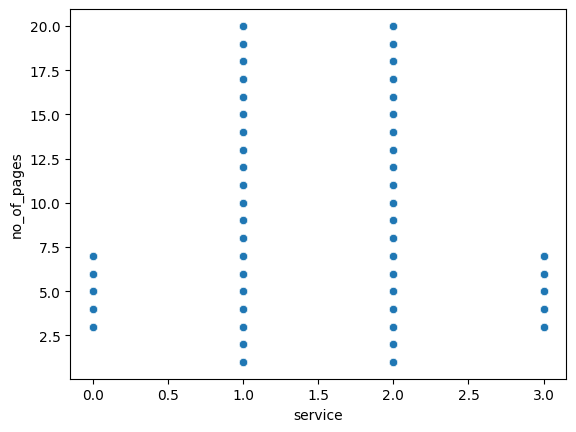

In [30]:
import seaborn as sns
sns.scatterplot(x='service',y='no_of_pages',data=X_train)

<Axes: xlabel='service', ylabel='no_of_pages'>

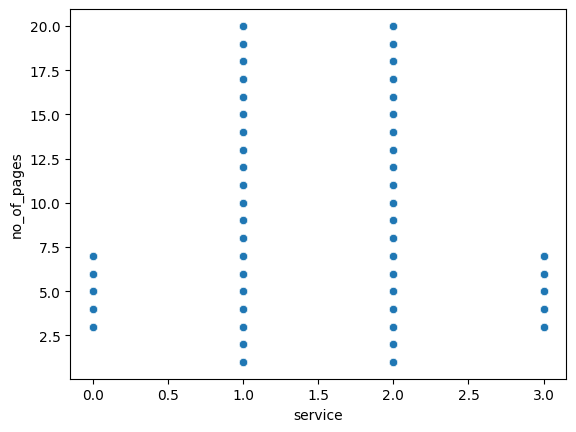

In [31]:
sns.scatterplot(x='service',y='no_of_pages',data=X_test)

<BarContainer object of 7000 artists>

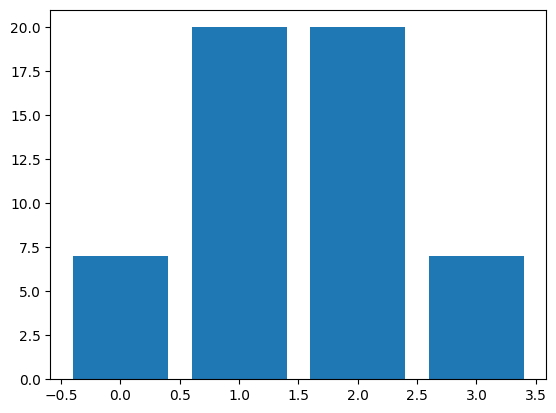

In [33]:
import matplotlib.pyplot as plt
plt.bar(X_train['service'],X_train['no_of_pages'])

<BarContainer object of 3000 artists>

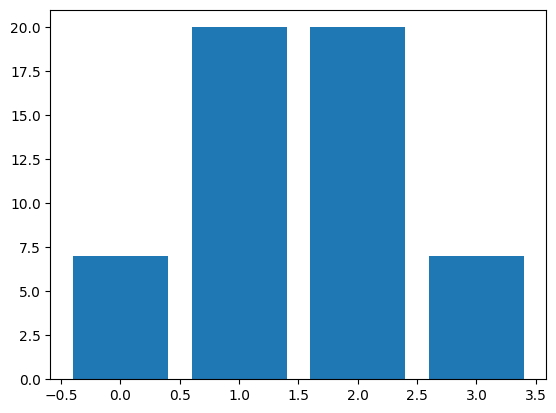

In [34]:
plt.bar(X_test['service'],X_test['no_of_pages'])

In [36]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(y_test,y_train,value=0)

(-2.8284448125806954, 0.0046774765016475385)